<a href="https://colab.research.google.com/github/Ashutosh621/is_vaccinated/blob/main/h1n1_Vaccine_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessory library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ashutosh621/Dataset/main/h1n1_vaccine_prediction.csv')

# Displaying the shape of the data.

In [3]:
df.shape

(26707, 34)

# Displaying the first five value in head.

In [4]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


# Checking the data type.

In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

# Checking for the NULL values in data set.

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Removing unnecessary columns.

In [7]:
remove_list = ['sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'sick_from_seas_vacc','marital_status', 'census_msa', 'sex', 'employment']

df = df.drop(remove_list, axis = 1)
df.head(4)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_h1n1_risky,is_seas_risky,age_bracket,qualification,race,income_level,housing_status,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,55 - 64 Years,< 12 Years,White,Below Poverty,Own,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,2.0,35 - 44 Years,12 Years,White,Below Poverty,Rent,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,18 - 34 Years,College Graduate,White,"<= $75,000, Above Poverty",Own,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,4.0,65+ Years,12 Years,White,Below Poverty,Rent,0.0,0.0,0


In [8]:
df.describe(exclude='number')

,age_bracket,qualification,race,income_level,housing_status
count,26707,25300,26707,22284,24665
unique,5,4,4,3,2
top,65+ Years,College Graduate,White,"<= $75,000, Above Poverty",Own
freq,6843,10097,21222,12777,18736


In [9]:
df.shape

(26707, 27)

# Displaying the missing values in percentage.

In [10]:
missing = pd.DataFrame(df.isna().mean().multiply(100).round(2), columns=['percent'])
missing

,percent
unique_id,0.00
h1n1_worry,0.34
h1n1_awareness,0.43
antiviral_medication,0.27
contact_avoidance,0.78
bought_face_mask,0.07
wash_hands_frequently,0.16
avoid_large_gatherings,0.33
reduced_outside_home_cont,0.31
avoid_touch_face,0.48


# Convert categorical variable into dummy/indicator variables.

In [11]:
df=pd.get_dummies(df,columns=["age_bracket","qualification","race","income_level","housing_status"])

In [12]:
df.dtypes

unique_id                                   int64
h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
is_seas_risky                             float64
no_of_adults                              float64


In [13]:
df.isnull().sum()

unique_id                                     0
h1n1_worry                                   92
h1n1_awareness                              116
antiviral_medication                         71
contact_avoidance                           208
bought_face_mask                             19
wash_hands_frequently                        42
avoid_large_gatherings                       87
reduced_outside_home_cont                    82
avoid_touch_face                            128
dr_recc_h1n1_vacc                          2160
dr_recc_seasonal_vacc                      2160
chronic_medic_condition                     971
cont_child_undr_6_mnths                     820
is_health_worker                            804
has_health_insur                          12274
is_h1n1_vacc_effective                      391
is_h1n1_risky                               388
is_seas_risky                               514
no_of_adults                                249
no_of_children                          

# Filling the NULL value with median.

In [14]:
null_cols = df.columns[df.isnull().any()]

for col in null_cols:
    mode = df[col].median()
    df[col].fillna(mode, inplace=True)

In [15]:
df.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
is_seas_risky                             0
no_of_adults                              0
no_of_children                            0
h1n1_vaccine                              0
age_bracket_18 - 34 Years       

# Importing the sklearn model selection.

In [16]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

# Spliting data for training and testing.

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20030, 39), (6677, 39), (20030,), (6677,))

# Importing the Machine Learning Model called Gradient Boosting Classifier and applying it to our data set.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier( loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8412880678981528
0.8445409615096601


# Ploting the result.

Text(0.5, 1.0, 'vaccination data')

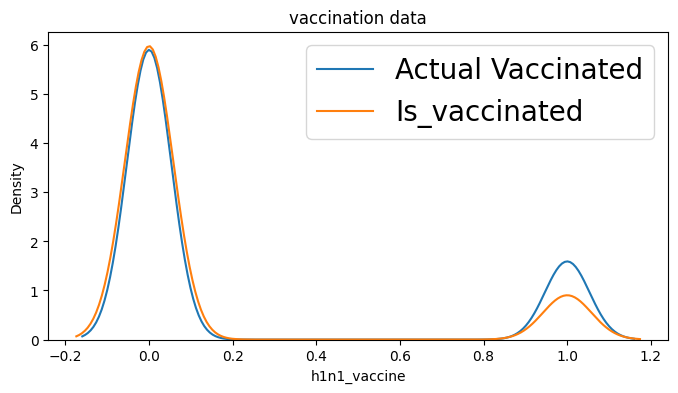

In [21]:
predictions=model.predict(X_test)
sub =({'key':df.unique_id ,'is_vaccinated': predictions})
plt.figure(figsize = (8, 4))
sns.kdeplot(df.h1n1_vaccine, label = 'Actual Vaccinated')
sns.kdeplot(predictions, label = 'Is_vaccinated')
plt.legend(prop = {'size': 20})
plt.title("vaccination data")

# Display the Confusion Matrix.

In [22]:
from sklearn import metrics

<Axes: >

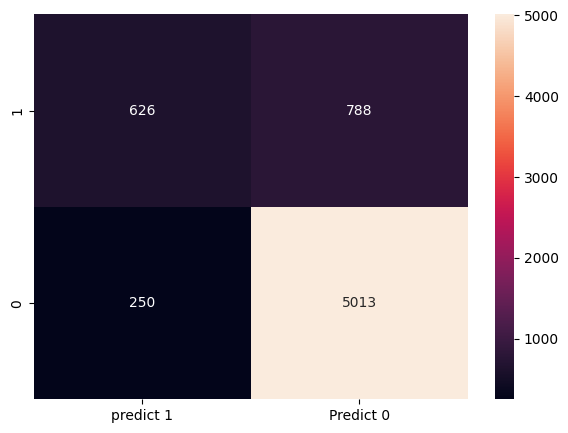

In [23]:
cm=metrics.confusion_matrix(y_test, predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
columns=[i for i in ["predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [24]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5263
           1       0.71      0.44      0.55      1414

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



# Importing the Machine Learning Model called Bagging Classifier and applying it to our data set.

In [25]:
from sklearn.ensemble import BaggingClassifier
model1= BaggingClassifier(n_estimators=3,base_estimator=model,max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0) 
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.8398901647528707
0.8437921222105736


# Ploting the result.

Text(0.5, 1.0, 'vaccination data')

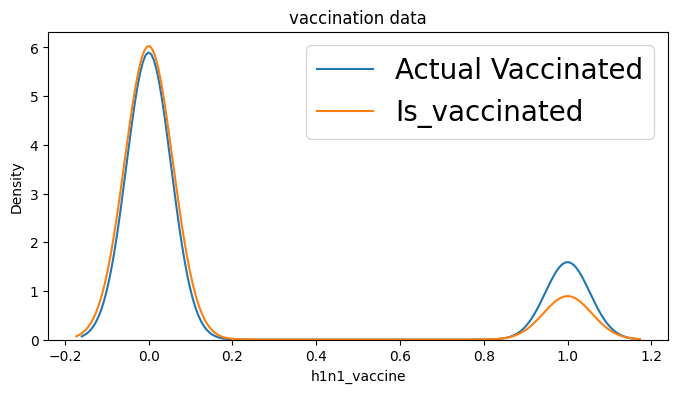

In [26]:
predictions=model1.predict(X_test)
sub =({'is_vaccinated': predictions})
plt.figure(figsize = (8, 4))
sns.kdeplot(df.h1n1_vaccine, label = 'Actual Vaccinated')
sns.kdeplot(predictions, label = 'Is_vaccinated')
plt.legend(prop = {'size': 20})
plt.title("vaccination data")

# Display the Confusion Matrix.

<Axes: >

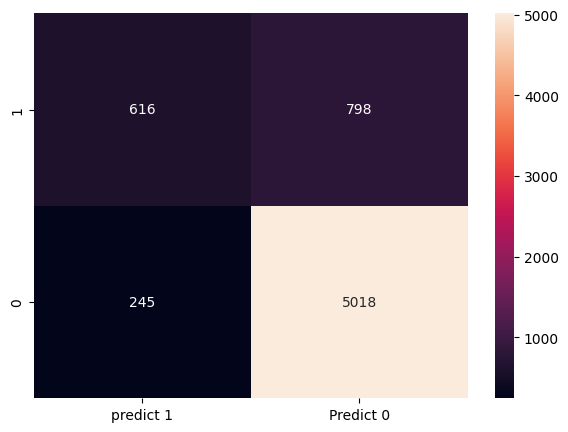

In [27]:
cm=metrics.confusion_matrix(y_test, predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
columns=[i for i in ["predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [28]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5263
           1       0.72      0.44      0.54      1414

    accuracy                           0.84      6677
   macro avg       0.79      0.69      0.72      6677
weighted avg       0.83      0.84      0.83      6677



# Saving result into a CSV file.

In [29]:
data = pd.DataFrame(sub)
data.to_csv('submission.csv', index=False)